# Day 2
## Today we will be working with the Heart Disease dataset from UCI
### Here's the link to the Dataset - https://archive.ics.uci.edu/dataset/45/heart+disease (Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.)



# Advanced Exploratory Data Analysis (EDA)

## Introduction
In this notebook, we will perform advanced Exploratory Data Analysis (EDA) on the "Heart Disease UCI" dataset. This dataset includes various medical attributes of patients, which can be used to predict the presence of heart disease. We will demonstrate advanced EDA techniques, feature engineering, and data profiling.

## Loading the Dataset
Let's start by loading the Heart Disease UCI dataset and displaying the first few rows.


In [22]:
# Libraries we will be using today

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [23]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                "thalach", "exang","oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=column_names)

# Display the first few rows
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


# 1. Data Profiling
Data profiling provides a summary of the dataset, including the data types, missing values, and basic statistics. This helps in understanding the structure and quality of the data.

### Steps for Data Profiling:
1. Check the data types of each column.
2. Identify the number of missing values in each column.
3. Display basic statistics of numerical columns.

Let's start by profiling the Heart Disease dataset.


In [24]:
# Data types of each column
data_types = df.dtypes.reset_index()
data_types.columns = ['Column', 'Data Type']

# Display the data types using tabulate
print(tabulate(data_types, headers='keys', tablefmt='grid'))


+----+----------+-------------+
|    | Column   | Data Type   |
+====+==========+=============+
|  0 | age      | float64     |
+----+----------+-------------+
|  1 | sex      | float64     |
+----+----------+-------------+
|  2 | cp       | float64     |
+----+----------+-------------+
|  3 | trestbps | float64     |
+----+----------+-------------+
|  4 | chol     | float64     |
+----+----------+-------------+
|  5 | fbs      | float64     |
+----+----------+-------------+
|  6 | restecg  | float64     |
+----+----------+-------------+
|  7 | thalach  | float64     |
+----+----------+-------------+
|  8 | exang    | float64     |
+----+----------+-------------+
|  9 | oldpeak  | float64     |
+----+----------+-------------+
| 10 | slope    | float64     |
+----+----------+-------------+
| 11 | ca       | object      |
+----+----------+-------------+
| 12 | thal     | object      |
+----+----------+-------------+
| 13 | target   | int64       |
+----+----------+-------------+


### Number of Missing Values in Each Column
We will use the `tabulate` library to display the number of missing values in each column in a table format.


In [25]:
# Number of missing values in each column
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']

# Display the missing values using tabulate
print(tabulate(missing_values, headers='keys', tablefmt='grid'))


+----+----------+------------------+
|    | Column   |   Missing Values |
+====+==========+==================+
|  0 | age      |                0 |
+----+----------+------------------+
|  1 | sex      |                0 |
+----+----------+------------------+
|  2 | cp       |                0 |
+----+----------+------------------+
|  3 | trestbps |                0 |
+----+----------+------------------+
|  4 | chol     |                0 |
+----+----------+------------------+
|  5 | fbs      |                0 |
+----+----------+------------------+
|  6 | restecg  |                0 |
+----+----------+------------------+
|  7 | thalach  |                0 |
+----+----------+------------------+
|  8 | exang    |                0 |
+----+----------+------------------+
|  9 | oldpeak  |                0 |
+----+----------+------------------+
| 10 | slope    |                0 |
+----+----------+------------------+
| 11 | ca       |                0 |
+----+----------+------------------+
|

### Basic Statistics of Numerical Columns
We will use the `tabulate` library to display the basic statistics of numerical columns in a table format.


In [26]:
# Basic statistics of numerical columns
basic_stats = df.describe().reset_index()
basic_stats = basic_stats.rename(columns={'index': 'Statistic'})

# Display the basic statistics using tabulate
print(basic_stats)


  Statistic         age         sex          cp    trestbps        chol  \
0     count  303.000000  303.000000  303.000000  303.000000  303.000000   
1      mean   54.438944    0.679868    3.158416  131.689769  246.693069   
2       std    9.038662    0.467299    0.960126   17.599748   51.776918   
3       min   29.000000    0.000000    1.000000   94.000000  126.000000   
4       25%   48.000000    0.000000    3.000000  120.000000  211.000000   
5       50%   56.000000    1.000000    3.000000  130.000000  241.000000   
6       75%   61.000000    1.000000    4.000000  140.000000  275.000000   
7       max   77.000000    1.000000    4.000000  200.000000  564.000000   

          fbs     restecg     thalach       exang     oldpeak       slope  \
0  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
1    0.148515    0.990099  149.607261    0.326733    1.039604    1.600660   
2    0.356198    0.994971   22.875003    0.469794    1.161075    0.616226   
3    0.000000   

# 2. Advanced EDA Techniques
Exploratory Data Analysis (EDA) helps in uncovering patterns, spotting anomalies, and checking assumptions through summary statistics and graphical representations.

### Steps for Advanced EDA:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

We'll use various visualization techniques to explore the Heart Disease dataset.


### Univariate Analysis
Univariate analysis involves examining the distribution and characteristics of individual variables.

#### Distribution of Age
Let's visualize the distribution of the 'age' column.


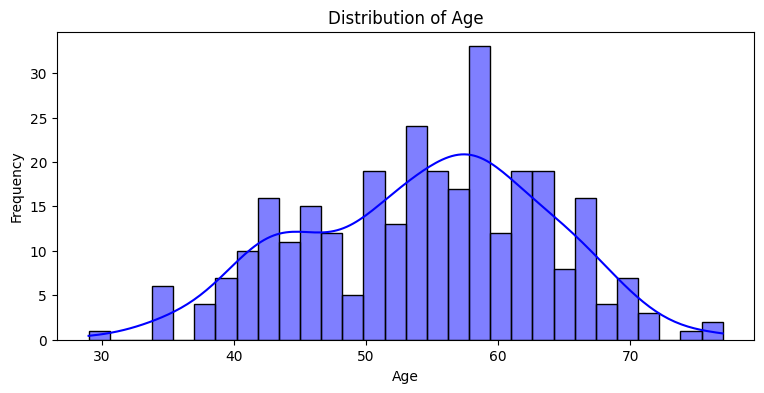

In [27]:
# Distribution of Age
plt.figure(figsize=(9, 4))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis
Bivariate analysis explores the relationship between two variables.

#### Heart Disease by Gender
Let's visualize the prevalence of heart disease by gender.


C:\Users\12367\AppData\Local\Temp\ipykernel_34108\3367329359.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='target', data=df, ci=None, palette='viridis')
C:\Users\12367\AppData\Local\Temp\ipykernel_34108\3367329359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='target', data=df, ci=None, palette='viridis')


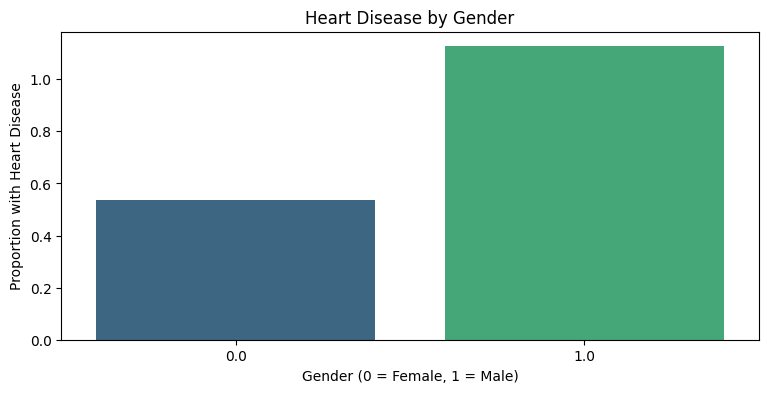

In [28]:
# Heart Disease by Gender
plt.figure(figsize=(9, 4))
sns.barplot(x='sex', y='target', data=df, ci=None, palette='viridis')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Proportion with Heart Disease')
plt.show()

### Multivariate Analysis
Multivariate analysis examines the interactions between more than two variables.

#### Pairplot of Numerical Features
Let's create a pairplot of numerical features colored by the presence of heart disease.


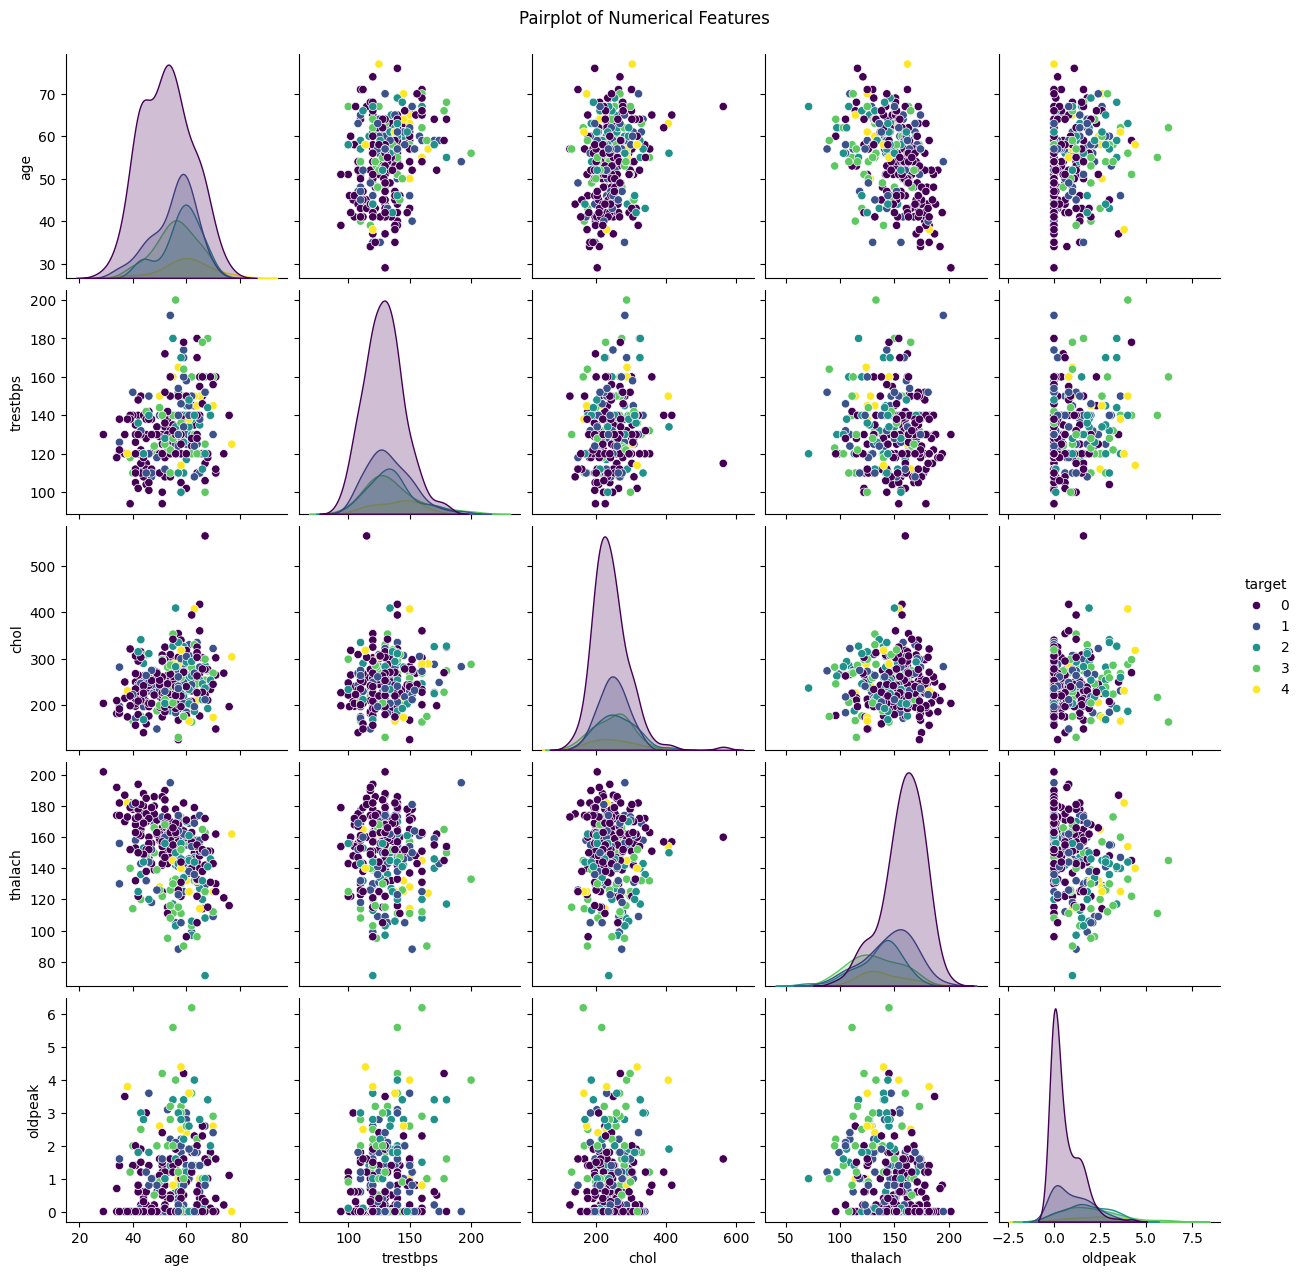

In [29]:
# Pairplot of Numerical Features
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


# 3.Feature Engineering
Feature engineering involves creating new features from existing ones to improve the performance of machine learning models.

### Steps for Feature Engineering:
1. Create new features based on domain knowledge.
2. Transform existing features to better represent the data.

Let's create new features in the Heart Disease dataset.


### Creating New Features
We'll create a new feature 'AgeGroup' by categorizing 'age' into bins.


In [30]:
# Create a new feature 'AgeGroup'
df['AgeGroup'] = pd.cut(df['age'], bins=[29, 39, 49, 59, 69, 79], labels=['30-39', '40-49', '50-59', '60-69', '70-79'])

# Display the first few rows with the new feature
df[['age', 'AgeGroup']].head()


,age,AgeGroup
0,63.0,60-69
1,67.0,60-69
2,67.0,60-69
3,37.0,30-39
4,41.0,40-49


### Transforming Existing Features
We'll transform the 'thalach' (maximum heart rate achieved) column by categorizing it into bins.


In [31]:
# Create a new feature 'HeartRateBin'
df['HeartRateBin'] = pd.qcut(df['thalach'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Display the first few rows with the new feature
df[['thalach', 'HeartRateBin']].head()


,thalach,HeartRateBin
0,150.0,Medium
1,108.0,Low
2,129.0,Low
3,187.0,Very High
4,172.0,Very High
